# Heart Disease Prediction Draft

## Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import missingno as msno

## Data Pre-Processing

### Import into Data Frame
Data Set with All Four Locations

In [ ]:
# Load dataset into a dataframe
heart_df = pd.read_csv('heart_disease_uci.csv')

# Display the first 10 rows of the dataset
heart_df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


<Axes: >

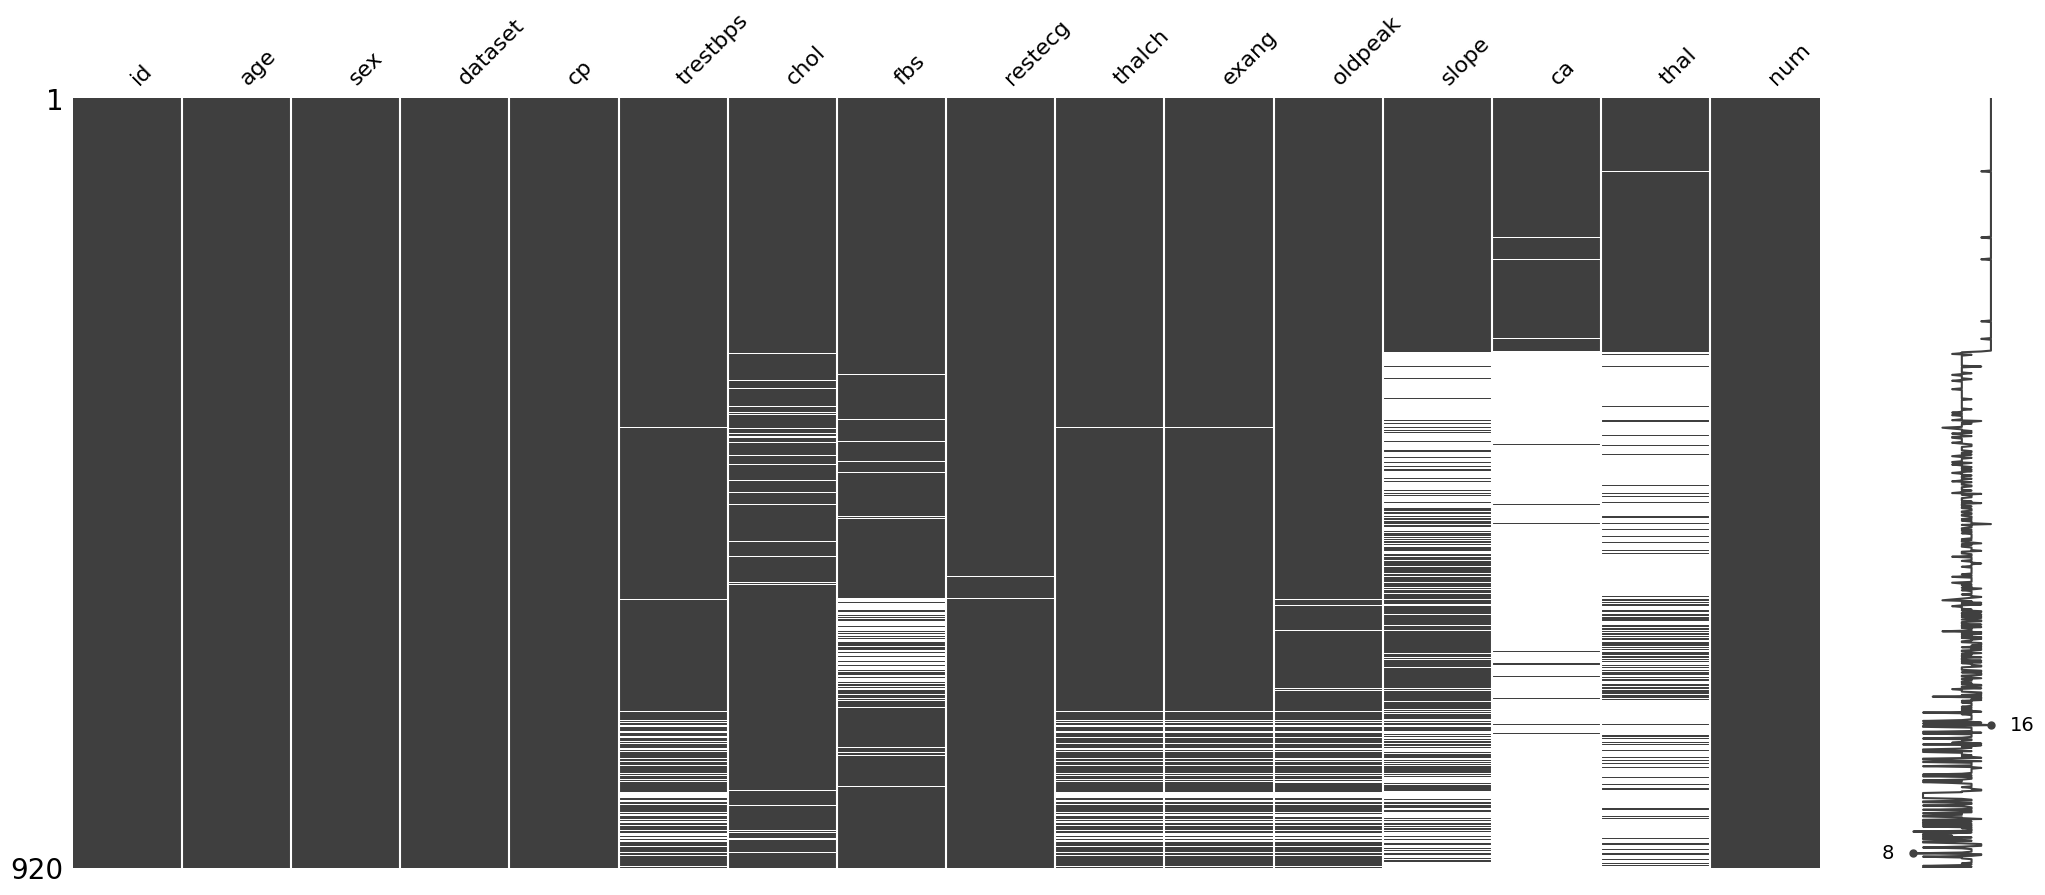

In [ ]:
heart_df.info()

# Visualize missing data
msno.matrix(heart_df)


### Import into Data Frame
Data from Cleveland

In [10]:
# Load dataset into a dataframe
cleveland_df = pd.read_csv('heart_disease_uci_cleveland.csv')

# Display the first 10 rows of the dataset
cleveland_df.tail(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
294,295,63,Female,Cleveland,asymptomatic,124,197,False,normal,136,True,0.0,flat,0.0,normal,1
295,296,41,Male,Cleveland,atypical angina,120,157,False,normal,182,False,0.0,upsloping,0.0,normal,0
296,297,59,Male,Cleveland,asymptomatic,164,176,True,lv hypertrophy,90,False,1.0,flat,2.0,fixed defect,3
297,298,57,Female,Cleveland,asymptomatic,140,241,False,normal,123,True,0.2,flat,0.0,reversable defect,1
298,299,45,Male,Cleveland,typical angina,110,264,False,normal,132,False,1.2,flat,0.0,reversable defect,1
299,300,68,Male,Cleveland,asymptomatic,144,193,True,normal,141,False,3.4,flat,2.0,reversable defect,2
300,301,57,Male,Cleveland,asymptomatic,130,131,False,normal,115,True,1.2,flat,1.0,reversable defect,3
301,302,57,Female,Cleveland,atypical angina,130,236,False,lv hypertrophy,174,False,0.0,flat,1.0,normal,1
302,303,38,Male,Cleveland,non-anginal,138,175,False,normal,173,False,0.0,upsloping,NaN,normal,0
303,304,28,Male,Cleveland,atypical angina,130,132,False,lv hypertrophy,185,False,0.0,NaN,NaN,NaN,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        304 non-null    int64  
 1   age       304 non-null    int64  
 2   sex       304 non-null    object 
 3   dataset   304 non-null    object 
 4   cp        304 non-null    object 
 5   trestbps  304 non-null    int64  
 6   chol      304 non-null    int64  
 7   fbs       304 non-null    bool   
 8   restecg   304 non-null    object 
 9   thalch    304 non-null    int64  
 10  exang     304 non-null    bool   
 11  oldpeak   304 non-null    float64
 12  slope     303 non-null    object 
 13  ca        299 non-null    float64
 14  thal      301 non-null    object 
 15  num       304 non-null    int64  
dtypes: bool(2), float64(2), int64(6), object(6)
memory usage: 34.0+ KB


<Axes: >

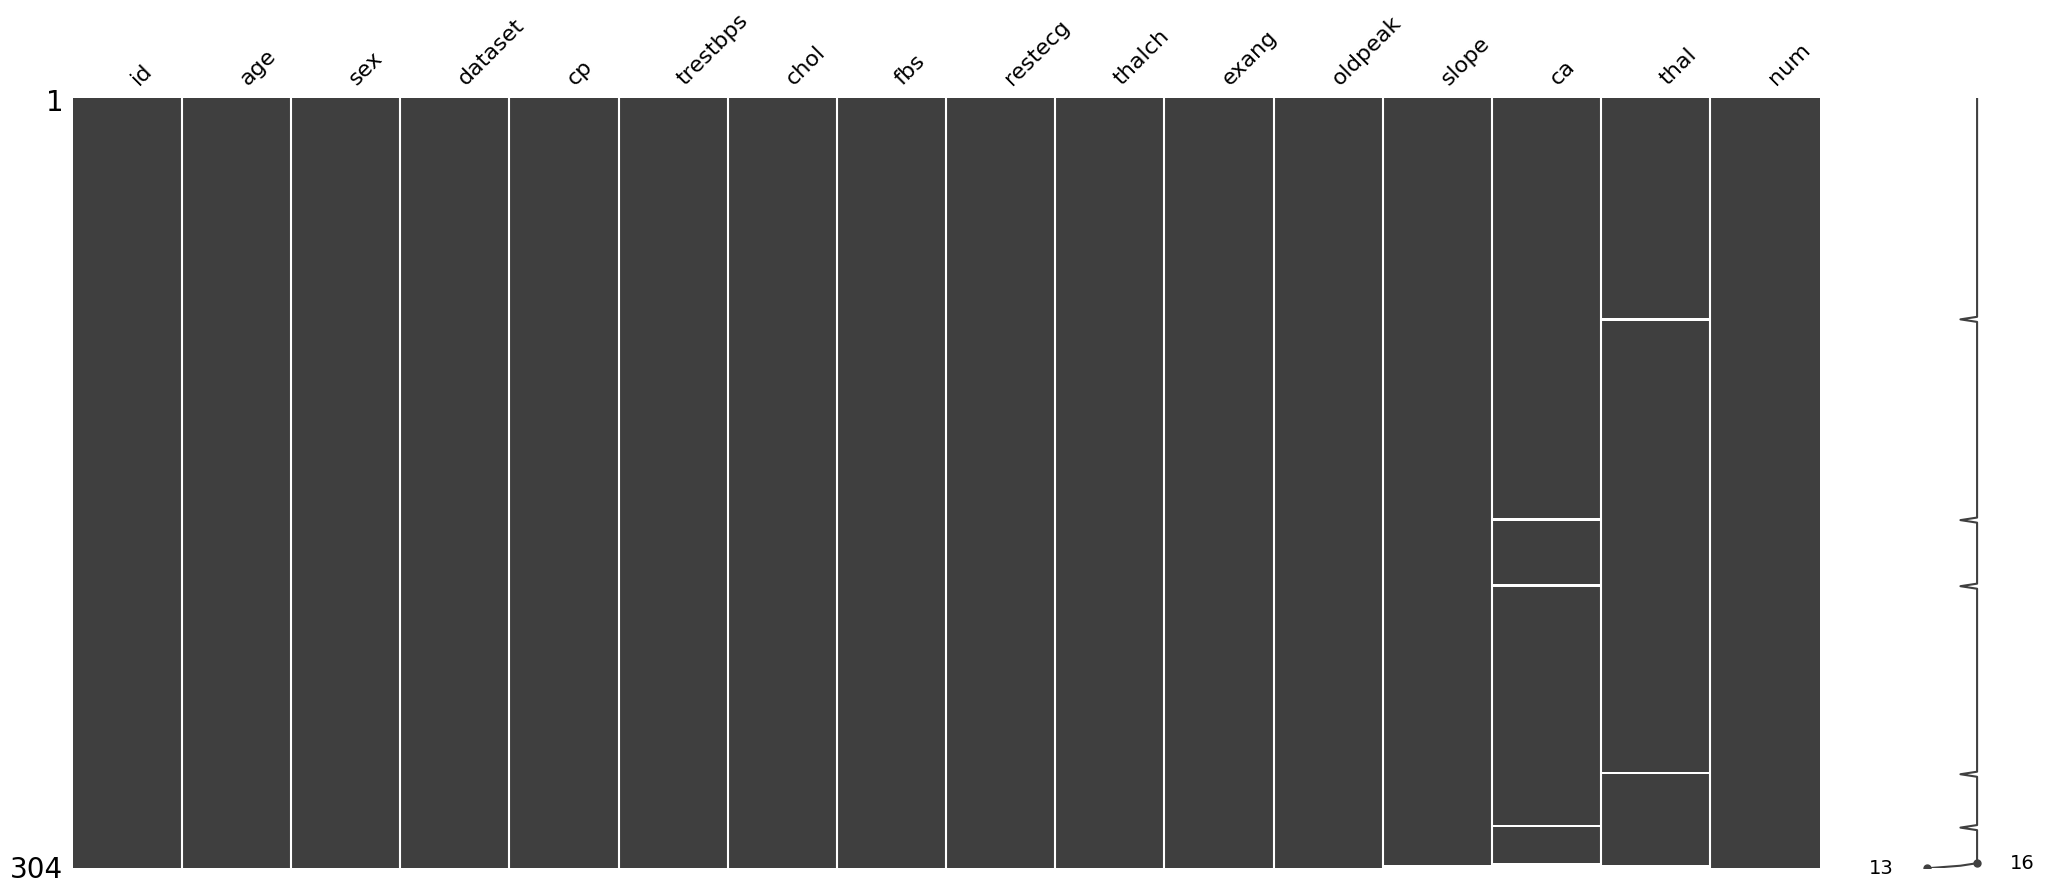

In [15]:
cleveland_df.info()

# Visualize missing data
msno.matrix(cleveland_df)
